# Предсказание сорта вина по химическому анализу

В этом проекте мы построим модели машинного обучения для предсказания сорта вина на основе результатов химического анализа. Мы будем использовать известный датасет "Wine" из библиотеки scikit-learn, который содержит результаты химического анализа вин, произведенных из трех разных сортов винограда в одном регионе Италии.

## Цель проекта
Построить и сравнить модели машинного обучения (логистическая регрессия и k-NN), которые смогут предсказать сорт вина на основе его химических характеристик.

## 1. Загрузка данных и библиотек

Начнем с импорта всех необходимых библиотек для работы с данными, построения моделей и визуализации результатов.

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

plt.style.use('default')
sns.set_palette("husl")

wine_data = load_wine(as_frame=True)

X = wine_data.data
y = wine_data.target

## 2. Исследование структуры датасета

Изучим структуру наших данных, чтобы лучше понять, с чем мы работаем.

In [50]:
print("Первые 5 строк признаков:")
X.head()

Первые 5 строк признаков:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [51]:
print("Информация о датасете:")
X.info()

Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-nul

In [52]:
print("Описательные статистики для признаков:")
X.describe()

Описательные статистики для признаков:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [79]:
y.value_counts()

target
1    71
0    59
2    48
Name: count, dtype: int64

In [54]:
print("Целевая переменная (сорта вин):")
print(f"Уникальные классы: {np.unique(y)}")
print(f"Названия классов: {wine_data.target_names}")
print("\nОписание признаков:")

for i, feature in enumerate(wine_data.feature_names):
    print(f"{i+1}. {feature}")

Целевая переменная (сорта вин):
Уникальные классы: [0 1 2]
Названия классов: ['class_0' 'class_1' 'class_2']

Описание признаков:
1. alcohol
2. malic_acid
3. ash
4. alcalinity_of_ash
5. magnesium
6. total_phenols
7. flavanoids
8. nonflavanoid_phenols
9. proanthocyanins
10. color_intensity
11. hue
12. od280/od315_of_diluted_wines
13. proline


## 3. Анализ распределения классов

Проверим, сбалансированы ли классы в нашем датасете. Это важно для понимания того, нужны ли специальные методы для работы с несбалансированными данными.

Распределение классов (сортов вина):
Класс 0 (class_0): 59 образцов (33.1%)
Класс 1 (class_1): 71 образцов (39.9%)
Класс 2 (class_2): 48 образцов (27.0%)


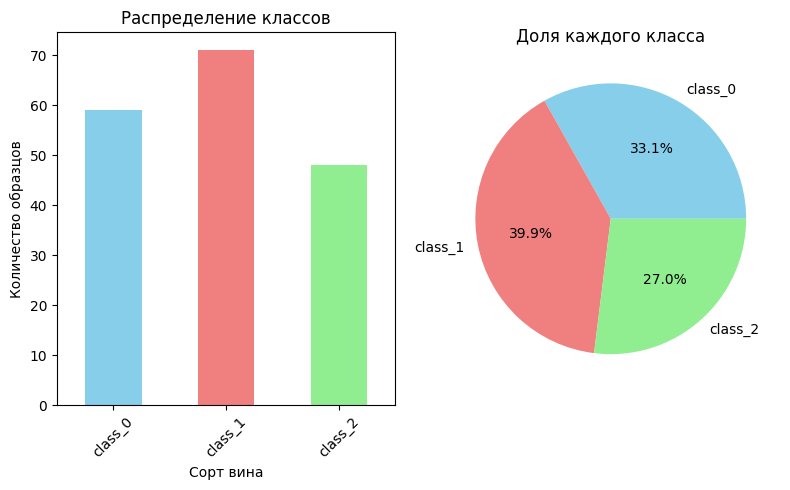

In [56]:
class_distribution = y.value_counts().sort_index()

print("Распределение классов (сортов вина):")

for i, (class_idx, count) in enumerate(class_distribution.items()):
    print(f"Класс {class_idx} ({wine_data.target_names[class_idx]}): {count} образцов ({count/len(y)*100:.1f}%)")

plt.figure(figsize=(8, 5))
plt.subplot(1, 2, 1)

class_distribution.plot(
    kind='bar',
    color=['skyblue', 'lightcoral', 'lightgreen']
)

plt.title('Распределение классов')
plt.xlabel('Сорт вина')
plt.ylabel('Количество образцов')
plt.xticks([0, 1, 2], wine_data.target_names, rotation=45)

plt.subplot(1, 2, 2)
plt.pie(
    class_distribution.values,
    labels=wine_data.target_names,
    autopct='%1.1f%%',
    colors=['skyblue', 'lightcoral', 'lightgreen']
)
plt.title('Доля каждого класса')

plt.tight_layout()
plt.show()

## 4. Разделение данных на обучающую и тестовую выборки

Разделим данные на обучающую (70%) и тестовую (30%) выборки. Используем фиксированный random_state для воспроизводимости результатов.

In [58]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Разделение данных завершено:")
print(f"Размер обучающей выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")

print("\nРаспределение классов в обучающей выборке:")
print(y_train.value_counts().sort_index())
print("\nРаспределение классов в тестовой выборке:")
print(y_test.value_counts().sort_index())

Разделение данных завершено:
Размер обучающей выборки: (124, 13)
Размер тестовой выборки: (54, 13)

Распределение классов в обучающей выборке:
target
0    41
1    50
2    33
Name: count, dtype: int64

Распределение классов в тестовой выборке:
target
0    18
1    21
2    15
Name: count, dtype: int64


## 5. Масштабирование признаков

Признаки в нашем датасете имеют разные масштабы (например, содержание алкоголя и кислотность измеряются в разных единицах). Масштабирование особенно важно для алгоритмов, которые используют расстояния между точками (как k-NN) или градиентные методы (как логистическая регрессия).

**Важно:** Мы обучаем скейлер только на обучающих данных, чтобы избежать утечки информации из тестовой выборки.

In [59]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Масштабирование признаков завершено!")
print(f"Среднее значение признаков до масштабирования: {X_train.mean().mean():.2f}")
print(f"Среднее значение признаков после масштабирования: {X_train_scaled.mean():.2f}")
print(f"Стандартное отклонение до масштабирования: {X_train.std().mean():.2f}")
print(f"Стандартное отклонение после масштабирования: {X_train_scaled.std():.2f}")

Масштабирование признаков завершено!
Среднее значение признаков до масштабирования: 69.27
Среднее значение признаков после масштабирования: 0.00
Стандартное отклонение до масштабирования: 25.72
Стандартное отклонение после масштабирования: 1.00


/tmp/ipykernel_10067/4005678532.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0, 0].boxplot([X_train.iloc[:, i] for i in range(4)], labels=X_train.columns[:4])
/tmp/ipykernel_10067/4005678532.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0, 1].boxplot([X_train_scaled[:, i] for i in range(4)], labels=X_train.columns[:4])


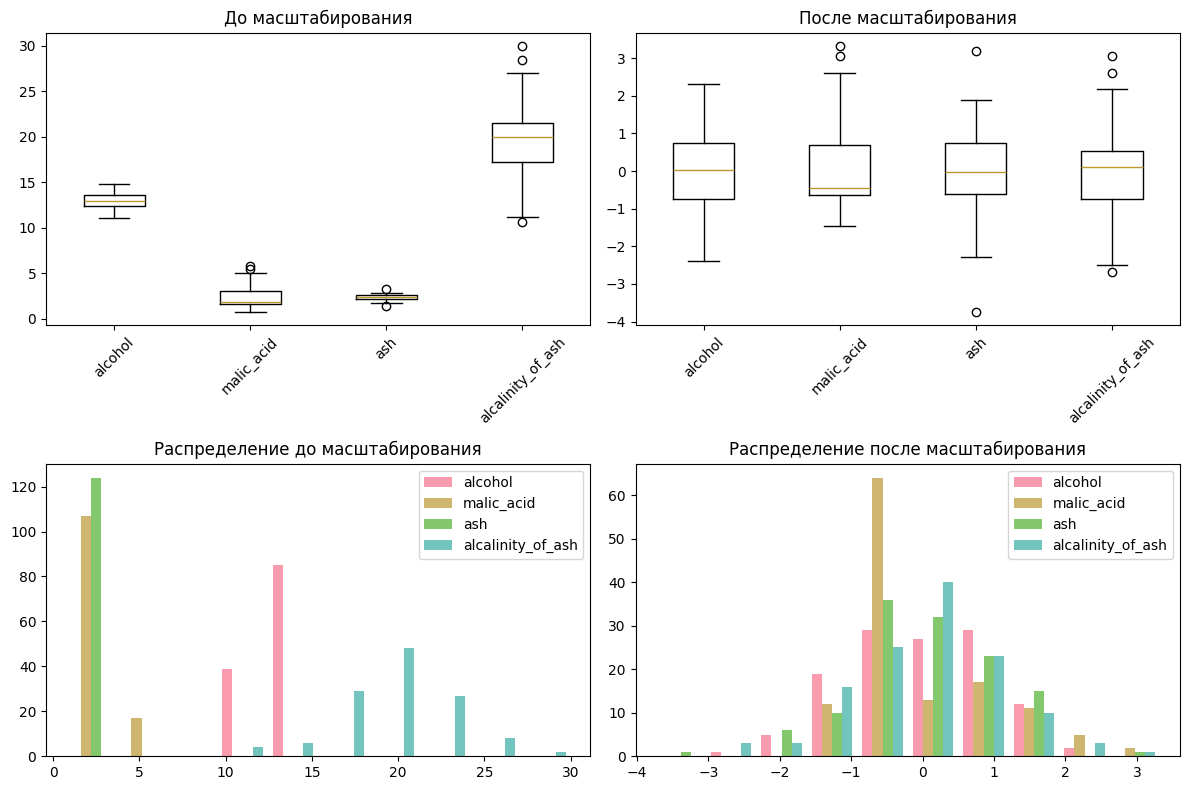

In [60]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# До масштабирования
axes[0, 0].boxplot([X_train.iloc[:, i] for i in range(4)], labels=X_train.columns[:4])
axes[0, 0].set_title('До масштабирования')
axes[0, 0].tick_params(axis='x', rotation=45)

# После масштабирования
axes[0, 1].boxplot([X_train_scaled[:, i] for i in range(4)], labels=X_train.columns[:4])
axes[0, 1].set_title('После масштабирования')
axes[0, 1].tick_params(axis='x', rotation=45)

# Гистограммы до масштабирования
axes[1, 0].hist([X_train.iloc[:, i] for i in range(4)], alpha=0.7, label=X_train.columns[:4])
axes[1, 0].set_title('Распределение до масштабирования')
axes[1, 0].legend()

# Гистограммы после масштабирования
axes[1, 1].hist([X_train_scaled[:, i] for i in range(4)], alpha=0.7, label=X_train.columns[:4])
axes[1, 1].set_title('Распределение после масштабирования')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

## 6. Обучение модели логистической регрессии

Логистическая регрессия - это линейный алгоритм классификации, который хорошо работает на задачах с линейно разделимыми классами. Он быстр в обучении и предсказании, а также предоставляет интерпретируемые результаты.

In [61]:
logistic_model = LogisticRegression(
    random_state=42,
    max_iter=1000
)

logistic_model.fit(X_train_scaled, y_train)

print("Модель логистической регрессии успешно обучена!")
print(f"Количество итераций до сходимости: {logistic_model.n_iter_}")

Модель логистической регрессии успешно обучена!
Количество итераций до сходимости: [17]


## 7. Оценка логистической регрессии

Оценим качество модели логистической регрессии на тестовых данных с помощью различных метрик.

In [62]:
y_pred_logistic = logistic_model.predict(X_test_scaled)

accuracy_logistic = accuracy_score(y_test, y_pred_logistic)

print(f"Точность логистической регрессии: {accuracy_logistic:.3f} ({accuracy_logistic*100:.1f}%)")

Точность логистической регрессии: 0.981 (98.1%)


In [63]:
print("Отчет о классификации для логистической регрессии:")
print("="*50)

classification_rep_logistic = classification_report(
    y_test, y_pred_logistic, target_names=wine_data.target_names, digits=3
)

print(classification_rep_logistic)

Отчет о классификации для логистической регрессии:
              precision    recall  f1-score   support

     class_0      0.947     1.000     0.973        18
     class_1      1.000     0.952     0.976        21
     class_2      1.000     1.000     1.000        15

    accuracy                          0.981        54
   macro avg      0.982     0.984     0.983        54
weighted avg      0.982     0.981     0.982        54



<Figure size 800x600 with 0 Axes>

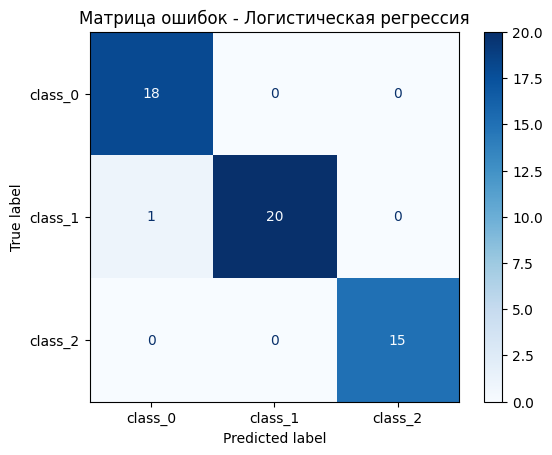

Матрица ошибок (логистическая регрессия):
[[18  0  0]
 [ 1 20  0]
 [ 0  0 15]]


In [65]:
cm_logistic = confusion_matrix(y_test, y_pred_logistic)

plt.figure(figsize=(8, 6))

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm_logistic,
    display_labels=wine_data.target_names
)

disp.plot(cmap='Blues', values_format='d')
plt.title('Матрица ошибок - Логистическая регрессия')
plt.show()

print("Матрица ошибок (логистическая регрессия):")
print(cm_logistic)

## 8. Обучение модели k-NN

k-NN (k-ближайших соседей) - это алгоритм, основанный на расстояниях. Он классифицирует объект на основе класса его k ближайших соседей в пространстве признаков. Этот алгоритм особенно чувствителен к масштабу признаков.

In [66]:
knn_model = KNeighborsClassifier(
    n_neighbors=5,
    metric='euclidean'
)

knn_model.fit(X_train_scaled, y_train)

print("Модель k-NN успешно обучена!")
print(f"Количество соседей: {knn_model.n_neighbors}")
print(f"Метрика расстояния: {knn_model.metric}")

Модель k-NN успешно обучена!
Количество соседей: 5
Метрика расстояния: euclidean


## 9. Оценка модели k-NN

Оценим качество модели k-NN на тестовых данных, используя те же метрики, что и для логистической регрессии.

In [67]:
y_pred_knn = knn_model.predict(X_test_scaled)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Точность k-NN: {accuracy_knn:.3f} ({accuracy_knn*100:.1f}%)")

Точность k-NN: 0.944 (94.4%)


In [68]:
print("Отчет о классификации для k-NN:")
print("="*50)

classification_rep_knn = classification_report(
    y_test, y_pred_knn,
    target_names=wine_data.target_names,
    digits=3
)
print(classification_rep_knn)

Отчет о классификации для k-NN:
              precision    recall  f1-score   support

     class_0      1.000     1.000     1.000        18
     class_1      1.000     0.857     0.923        21
     class_2      0.833     1.000     0.909        15

    accuracy                          0.944        54
   macro avg      0.944     0.952     0.944        54
weighted avg      0.954     0.944     0.945        54



<Figure size 800x600 with 0 Axes>

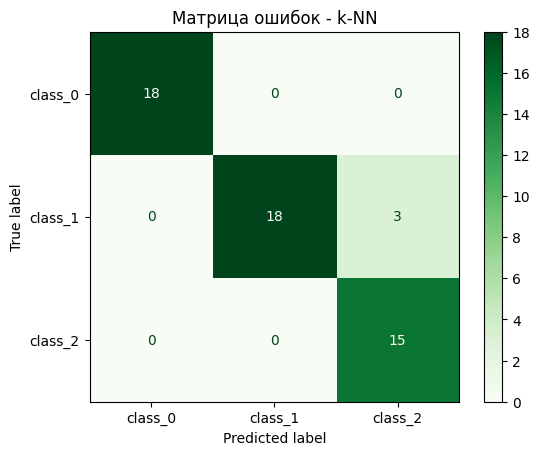

Матрица ошибок (k-NN):
[[18  0  0]
 [ 0 18  3]
 [ 0  0 15]]


In [69]:
cm_knn = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(8, 6))

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm_knn,
    display_labels=wine_data.target_names
)

disp.plot(cmap='Greens', values_format='d')
plt.title('Матрица ошибок - k-NN')
plt.show()

print("Матрица ошибок (k-NN):")
print(cm_knn)

## 10. Сравнение результатов моделей

Теперь сравним производительность обеих моделей и сделаем выводы о том, какая модель лучше подходит для нашей задачи.

In [77]:
print("СРАВНЕНИЕ МОДЕЛЕЙ")
print("="*50)
print(f"Логистическая регрессия - Точность: {accuracy_logistic:.3f} ({accuracy_logistic*100:.1f}%)")
print(f"k-NN (k=5) - Точность: {accuracy_knn:.3f} ({accuracy_knn*100:.1f}%)")

if accuracy_logistic > accuracy_knn:
    print(f"\nЛучшая модель: Логистическая регрессия (+{(accuracy_logistic-accuracy_knn)*100:.1f}%)")
elif accuracy_knn > accuracy_logistic:
    print(f"\nЛучшая модель: k-NN (+{(accuracy_knn-accuracy_logistic)*100:.1f}%)")
else:
    print(f"\nМодели показали одинаковую точность")

СРАВНЕНИЕ МОДЕЛЕЙ
Логистическая регрессия - Точность: 0.981 (98.1%)
k-NN (k=5) - Точность: 0.944 (94.4%)

Лучшая модель: Логистическая регрессия (+3.7%)


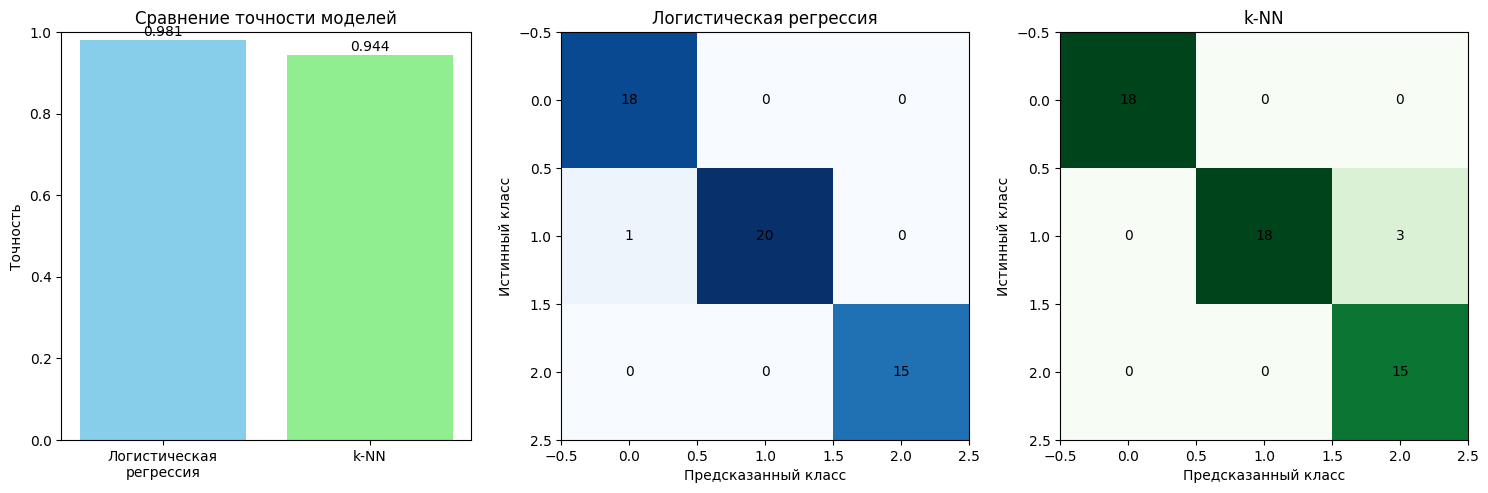

In [78]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

models = ['Логистическая\nрегрессия', 'k-NN']
accuracies = [accuracy_logistic, accuracy_knn]
colors = ['skyblue', 'lightgreen']

axes[0].bar(models, accuracies, color=colors)
axes[0].set_title('Сравнение точности моделей')
axes[0].set_ylabel('Точность')
axes[0].set_ylim(0, 1)
for i, acc in enumerate(accuracies):
    axes[0].text(i, acc + 0.01, f'{acc:.3f}', ha='center')

im1 = axes[1].imshow(cm_logistic, cmap='Blues', interpolation='nearest')
axes[1].set_title('Логистическая регрессия')
axes[1].set_xlabel('Предсказанный класс')
axes[1].set_ylabel('Истинный класс')

im2 = axes[2].imshow(cm_knn, cmap='Greens', interpolation='nearest')
axes[2].set_title('k-NN')
axes[2].set_xlabel('Предсказанный класс')
axes[2].set_ylabel('Истинный класс')

for i in range(len(wine_data.target_names)):
    for j in range(len(wine_data.target_names)):
        axes[1].text(j, i, cm_logistic[i, j], ha="center", va="center", color="black")
        axes[2].text(j, i, cm_knn[i, j], ha="center", va="center", color="black")

plt.tight_layout()
plt.show()

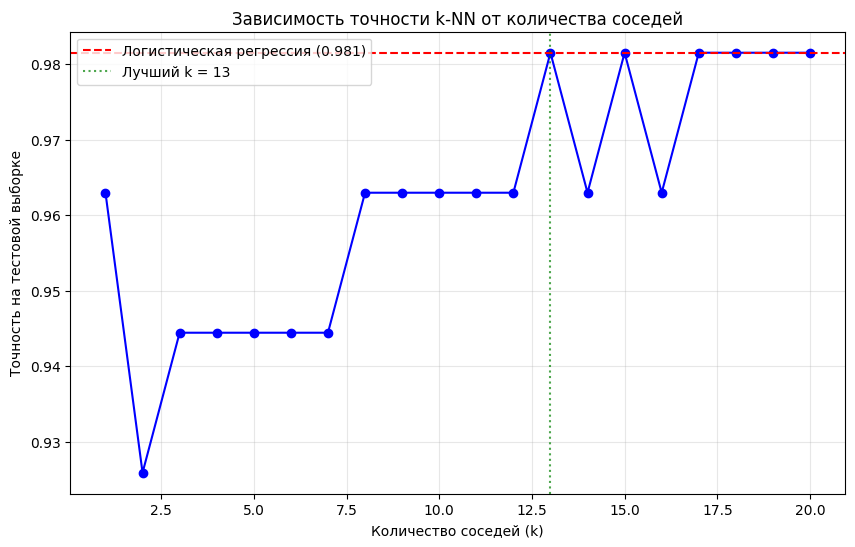

Оптимальное значение k: 13
Лучшая точность k-NN: 0.981


In [42]:
k_values = range(1, 21)
knn_accuracies = []

for k in k_values:
    knn_temp = KNeighborsClassifier(n_neighbors=k)
    knn_temp.fit(X_train_scaled, y_train)
    y_pred_temp = knn_temp.predict(X_test_scaled)
    accuracy_temp = accuracy_score(y_test, y_pred_temp)
    knn_accuracies.append(accuracy_temp)

best_k = k_values[np.argmax(knn_accuracies)]
best_knn_accuracy = max(knn_accuracies)

plt.figure(figsize=(10, 6))
plt.plot(k_values, knn_accuracies, 'b-o', markersize=6)
plt.axhline(y=accuracy_logistic, color='r', linestyle='--', label=f'Логистическая регрессия ({accuracy_logistic:.3f})')
plt.axvline(x=best_k, color='g', linestyle=':', alpha=0.7, label=f'Лучший k = {best_k}')
plt.xlabel('Количество соседей (k)')
plt.ylabel('Точность на тестовой выборке')
plt.title('Зависимость точности k-NN от количества соседей')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"Оптимальное значение k: {best_k}")
print(f"Лучшая точность k-NN: {best_knn_accuracy:.3f}")